<a href="https://colab.research.google.com/github/awol380/Machine-Learning-2410-Assignment-Group1/blob/main/Phase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting XYZ
## Phase 1: Data Pre-processing, Exploration and Visualisation <br>
### Group Name: ProjectGroup 1
### Adam Wall s3923668
### Kushgar Singh s4027002
### Ayush Tripathi s3941245

## Table of Contents

## Introduction
### Dataset Source:

The source of the dataset on Vehicle Fuel Economy was Kaggle (MAHARAJ, 2024).  The vehicles included in the dataset include models from 1984 to 2017.

### Dataset Details:
The original dataset has 81 features such as transmission, cyclinders, fuel type, fuel consumption and cO2 emissions. There are 38,113 records. The dataset lists one car per record which are independent of each other.

### Dataset Features:
### Target Feature:

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
# see all the columns
pd.set_option('display.max_columns', None)



In [2]:
url = 'https://raw.githubusercontent.com/awol380/Machine-Learning-2410-Assignment-Group1/main/fuel.csv'
data = pd.read_csv(url)

In [3]:
data

,vehicle_id,year,make,model,class,drive,transmission,transmission_type,engine_index,engine_descriptor,engine_cylinders,engine_displacement,turbocharger,supercharger,fuel_type,fuel_type_1,fuel_type_2,city_mpg_ft1,unrounded_city_mpg_ft1,city_mpg_ft2,unrounded_city_mpg_ft2,city_gasoline_consumption_cd,city_electricity_consumption,city_utility_factor,highway_mpg_ft1,unrounded_highway_mpg_ft1,highway_mpg_ft2,unrounded_highway_mpg_ft2,highway_gasoline_consumption_cd,highway_electricity_consumption,highway_utility_factor,unadjusted_city_mpg_ft1,unadjusted_highway_mpg_ft1,unadjusted_city_mpg_ft2,unadjusted_highway_mpg_ft2,combined_mpg_ft1,unrounded_combined_mpg_ft1,combined_mpg_ft2,unrounded_combined_mpg_ft2,combined_electricity_consumption,combined_gasoline_consumption_cd,combined_utility_factor,annual_fuel_cost_ft1,annual_fuel_cost_ft2,gas_guzzler_tax,save_or_spend_5_year,annual_consumption_in_barrels_ft1,annual_consumption_in_barrels_ft2,tailpipe_co2_ft1,tailpipe_co2_in_grams_mile_ft1,tailpipe_co2_ft2,tailpipe_co2_in_grams_mile_ft2,fuel_economy_score,ghg_score,ghg_score_alt_fuel,my_mpg_data,x2d_passenger_volume,x2d_luggage_volume,x4d_passenger_volume,x4d_luggage_volume,hatchback_passenger_volume,hatchback_luggage_volume,start_stop_technology,alternative_fuel_technology,electric_motor,manufacturer_code,gasoline_electricity_blended_cd,vehicle_charger,alternate_charger,hours_to_charge_120v,hours_to_charge_240v,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,range_ft2,city_range_ft2,highway_range_ft2
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0000,0,0.0000,0.0000,0.0,0.000,24,0.0000,0,0.00,0.0000,0.0,0.00,21.0000,34.0000,0.0,0.0,20,0.0000,0,0.0000,0.0,0.0000,0.000,1750,0,NaN,-2000,16.480500,0.000000,-1,444.350000,-1,0.0,-1,-1,-1,N,74,7,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0000,0,0.0000,0.0000,0.0,0.000,24,0.0000,0,0.00,0.0000,0.0,0.00,21.0000,34.0000,0.0,0.0,20,0.0000,0,0.0000,0.0,0.0000,0.000,1750,0,NaN,-2000,16.480500,0.000000,-1,444.350000,-1,0.0,-1,-1,-1,N,74,7,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0000,0,0.0000,0.0000,0.0,0.000,25,0.0000,0,0.00,0.0000,0.0,0.00,23.0000,35.0000,0.0,0.0,21,0.0000,0,0.0000,0.0,0.0000,0.000,1650,0,NaN,-1500,15.695714,0.000000,-1,423.190476,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0000,0,0.0000,0.0000,0.0,0.000,25,0.0000,0,0.00,0.0000,0.0,0.00,23.0000,35.0000,0.0,0.0,21,0.0000,0,0.0000,0.0,0.0000,0.000,1650,0,NaN,-1500,15.695714,0.000000,-1,423.190476,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),4.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0000,0,0.0000,0.0000,0.0,0.000,17,0.0000,0,0.00,0.0000,0.0,0.00,22.0000,24.0000,0.0,0.0,17,0.0000,0,0.0000,0.0,0.0000,0.000,2050,0,NaN,-3500,19.388824,0.000000,-1,522.764706,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [4]:
data.shape

(38113, 81)

In [5]:
data.columns.to_list()

['vehicle_id',
 'year',
 'make',
 'model',
 'class',
 'drive',
 'transmission',
 'transmission_type',
 'engine_index',
 'engine_descriptor',
 'engine_cylinders',
 'engine_displacement',
 'turbocharger',
 'supercharger',
 'fuel_type',
 'fuel_type_1',
 'fuel_type_2',
 'city_mpg_ft1',
 'unrounded_city_mpg_ft1',
 'city_mpg_ft2',
 'unrounded_city_mpg_ft2',
 'city_gasoline_consumption_cd',
 'city_electricity_consumption',
 'city_utility_factor',
 'highway_mpg_ft1',
 'unrounded_highway_mpg_ft1',
 'highway_mpg_ft2',
 'unrounded_highway_mpg_ft2',
 'highway_gasoline_consumption_cd',
 'highway_electricity_consumption',
 'highway_utility_factor',
 'unadjusted_city_mpg_ft1',
 'unadjusted_highway_mpg_ft1',
 'unadjusted_city_mpg_ft2',
 'unadjusted_highway_mpg_ft2',
 'combined_mpg_ft1',
 'unrounded_combined_mpg_ft1',
 'combined_mpg_ft2',
 'unrounded_combined_mpg_ft2',
 'combined_electricity_consumption',
 'combined_gasoline_consumption_cd',
 'combined_utility_factor',
 'annual_fuel_cost_ft1',
 'annual

In [6]:
#dropping columns from the original dataset
data = data.loc[:,['vehicle_id','year','make','model','class','drive','transmission','engine_cylinders','engine_displacement','fuel_type','fuel_type_1','city_mpg_ft1','highway_mpg_ft1','highway_electricity_consumption','combined_mpg_ft1','combined_electricity_consumption','annual_fuel_cost_ft1','annual_consumption_in_barrels_ft1','tailpipe_co2_in_grams_mile_ft1','start_stop_technology']]

In [7]:
data.shape

(38113, 20)

In [8]:
data.dtypes

vehicle_id                             int64
year                                   int64
make                                  object
model                                 object
class                                 object
drive                                 object
transmission                          object
engine_cylinders                     float64
engine_displacement                  float64
fuel_type                             object
fuel_type_1                           object
city_mpg_ft1                           int64
highway_mpg_ft1                        int64
highway_electricity_consumption      float64
combined_mpg_ft1                       int64
combined_electricity_consumption     float64
annual_fuel_cost_ft1                   int64
annual_consumption_in_barrels_ft1    float64
tailpipe_co2_in_grams_mile_ft1       float64
start_stop_technology                float64
dtype: object

In [9]:
data = data.set_index('vehicle_id')

In [10]:
data.isna().sum() #identify empty variables

year                                     0
make                                     0
model                                    0
class                                    0
drive                                 1189
transmission                            11
engine_cylinders                       136
engine_displacement                    134
fuel_type                                0
fuel_type_1                              0
city_mpg_ft1                             0
highway_mpg_ft1                          0
highway_electricity_consumption          0
combined_mpg_ft1                         0
combined_electricity_consumption         0
annual_fuel_cost_ft1                     0
annual_consumption_in_barrels_ft1        0
tailpipe_co2_in_grams_mile_ft1           0
start_stop_technology                38113
dtype: int64

In [11]:
data = data.drop(['start_stop_technology'], axis=1)

In [12]:
data = data.dropna() #low volumes of NA values, less than 10% of dataset. Many are categorical which cannot be imputed by numeric means.

In [13]:
data.nunique() #identify any constant columns

year                                   34
make                                  127
model                                3662
class                                  34
drive                                   7
transmission                           45
engine_cylinders                        9
engine_displacement                    65
fuel_type                              13
fuel_type_1                             5
city_mpg_ft1                           52
highway_mpg_ft1                        50
highway_electricity_consumption        24
combined_mpg_ft1                       49
combined_electricity_consumption       27
annual_fuel_cost_ft1                   58
annual_consumption_in_barrels_ft1     135
tailpipe_co2_in_grams_mile_ft1        590
dtype: int64

In [14]:
data.describe(include=object) #summarise categorical features

,make,model,class,drive,transmission,fuel_type,fuel_type_1
count,36794,36794,36794,36794,36794,36794,36794
unique,127,3662,34,7,45,13,5
top,Chevrolet,F150 Pickup 2WD,Compact Cars,Front-Wheel Drive,Automatic 4-Speed,Regular,Regular Gasoline
freq,3710,208,5253,13303,10785,24230,25503


In [15]:
categorical_features= list(data.columns[data.dtypes == object])

In [16]:
for feature in categorical_features:
  print(f'{feature}')
  print(data[feature].unique())
  print("\n")
  #engine_cylinders nan

make
['AM General' 'American Motors Corporation' 'Buick' 'Cadillac' 'Chevrolet'
 'Dodge' 'Ford' 'GMC' 'Grumman Olson' 'Import Foreign Auto Sales Inc'
 'Isuzu' 'Jeep' 'Mazda' 'Mitsubishi' 'Nissan' 'Plymouth'
 'S and S Coach Company  E.p. Dutton' 'Subaru'
 'Superior Coaches Div E.p. Dutton' 'Suzuki' 'Toyota' 'Volkswagen'
 'Alfa Romeo' 'Aston Martin' 'Audi' 'Bertone'
 'Bill Dovell Motor Car Company' 'BMW' 'Chrysler' 'E. P. Dutton, Inc.'
 'Ferrari' 'Honda' 'Jaguar' 'Lincoln' 'Lotus' 'Maserati' 'Mercedes-Benz'
 'Mercury' 'Merkur' 'Oldsmobile' 'Peugeot' 'Pininfarina' 'Pontiac'
 'Porsche' 'Renault' 'Rolls-Royce' 'Saab' 'TVR Engineering Ltd' 'Volvo'
 'Acura' 'Autokraft Limited' 'Bitter Gmbh and Co. Kg' 'Hyundai'
 'Lambda Control Systems' 'Lamborghini' 'London Coach Co Inc'
 'Panther Car Company Limited' 'Texas Coach Company' 'Vixen Motor Company'
 'Volga Associated Automobile' 'Yugo' 'ASC Incorporated' 'CCC Engineering'
 'CX Automotive' 'Excalibur Autos' 'Land Rover' 'Mcevoy Motors'
 'Red Shif

In [17]:
#Data prep for data['class'] feature
data['class'] = data['class'].str.replace('2WD','', case=False)
data['class'] = data['class'].str.replace('4WD','', case=False)
data['class'] = data['class'].str.replace('/','', case=False)
data['class'] = data['class'].str.replace(' -','', case=False)
data['class'] = data['class'].str.strip()
data['class'].unique()

array(['Special Purpose Vehicle', 'Large Cars', 'Standard Pickup Trucks',
       'Vans, Passenger Type', 'Vans, Cargo Type',
       'Special Purpose Vehicles', 'Small Pickup Trucks',
       'Minicompact Cars', 'Two Seaters', 'Subcompact Cars',
       'Midsize Cars', 'Midsize-Large Station Wagons', 'Compact Cars',
       'Small Station Wagons', 'Vans', 'Vans Passenger',
       'Midsize Station Wagons', 'Sport Utility Vehicle', 'Minivan',
       'Small Sport Utility Vehicle', 'Standard Sport Utility Vehicle'],
      dtype=object)

In [18]:
data['class'] = data['class'].str.replace('Special Purpose Vehicles','Special Purpose Vehicle')
data['class'] = data['class'].str.replace('Vans Passenger','Vans, Passenger Type')
data['class'] = data['class'].str.replace('Minivan','Vans, Passenger Type')
data['class'] = data['class'].str.replace('Standard ','')
data['class'].value_counts()

class
Compact Cars                    5253
Pickup Trucks                   4514
Subcompact Cars                 4484
Sport Utility Vehicle           4307
Midsize Cars                    4165
Special Purpose Vehicle         2371
Two Seaters                     1820
Large Cars                      1810
Small Station Wagons            1382
Minicompact Cars                1230
Small Pickup Trucks             1190
Vans                            1141
Small Sport Utility Vehicle      924
Vans, Passenger Type             700
Midsize-Large Station Wagons     640
Vans, Cargo Type                 438
Midsize Station Wagons           425
Name: count, dtype: int64

In [19]:
#Data prep for data['transmission'] feature
data['transmission'].value_counts()

transmission
Automatic 4-Speed                   10785
Manual 5-Speed                       7959
Automatic 3-Speed                    2720
Automatic (S6)                       2684
Manual 6-Speed                       2448
Automatic 5-Speed                    2191
Automatic 6-Speed                    1447
Manual 4-Speed                       1368
Automatic (S8)                        977
Automatic (S5)                        827
Automatic (variable gear ratios)      697
Automatic 7-Speed                     675
Automatic (S7)                        270
Auto(AM-S7)                           266
Automatic 8-Speed                     259
Automatic (S4)                        233
Auto(AM7)                             166
Auto(AV-S6)                           153
Auto(AM6)                             120
Automatic 9-Speed                     105
Auto(AM-S6)                            87
Auto(AV-S7)                            80
Manual 3-Speed                         77
Manual 7-Speed       

In [20]:
data['transmission'] = data['transmission'].str.replace('Automatic','Auto')
data[['transmission', 'gears']] = data['transmission'].str.split(' ', n = 1, expand=True)
data[['transmission', 'gears2']] = data['transmission'].str.split('(', n = 1, expand=True)
data['transmission'].value_counts()

transmission
Auto      24865
Manual    11929
Name: count, dtype: int64

In [21]:
#Data prep for new feature data['gear']
data['gears'].fillna(data['gears2'])
data = data.drop(['gears2'], axis=1)
data['gears'] = data['gears'].str.extract('(\d+)')

In [22]:
#Data prep for data['fuel_type'] feature
data['fuel_type'].value_counts()

fuel_type
Regular                        24230
Premium                        10132
Gasoline or E85                 1223
Diesel                           857
Premium or E85                   122
Midgrade                          77
CNG                               60
Premium and Electricity           25
Gasoline or natural gas           20
Regular Gas and Electricity       20
Premium Gas or Electricity        18
Gasoline or propane                8
Regular Gas or Electricity         2
Name: count, dtype: int64

In [23]:
fuel_df = data.loc[:,['fuel_type','fuel_type_1']]
pd.pivot_table(fuel_df, index='fuel_type', columns='fuel_type_1', aggfunc=len, fill_value=0)

fuel_type_1,Diesel,Midgrade Gasoline,Natural Gas,Premium Gasoline,Regular Gasoline
fuel_type,,,,,
CNG,0,0,60,0,0
Diesel,857,0,0,0,0
Gasoline or E85,0,0,0,0,1223
Gasoline or natural gas,0,0,0,0,20
Gasoline or propane,0,0,0,0,8
Midgrade,0,77,0,0,0
Premium,0,0,0,10132,0
Premium Gas or Electricity,0,0,0,18,0
Premium and Electricity,0,0,0,25,0


In [24]:
data.loc[data['fuel_type'] == 'Premium Gas or Electricity', 'fuel_type_1'] = 'Premium Plug-in Hybrid'
data.loc[data['fuel_type'] == 'Regular Gas or Electricity', 'fuel_type_1'] = 'Regular Plug-in Hybrid'
data.loc[data['fuel_type'] == 'Premium Gas and Electricity', 'fuel_type_1'] = 'Premium Hybrid'
data.loc[data['fuel_type'] == 'Regular Gas and Electricity', 'fuel_type_1'] = 'Regular Hybrid'
data = data.drop(['fuel_type'], axis=1)

In [25]:
data.describe(include=np.number).round(2) #summarise numeric features
#year should be categorical? or removed

,year,engine_cylinders,engine_displacement,city_mpg_ft1,highway_mpg_ft1,highway_electricity_consumption,combined_mpg_ft1,combined_electricity_consumption,annual_fuel_cost_ft1,annual_consumption_in_barrels_ft1,tailpipe_co2_in_grams_mile_ft1
count,36794.00,36794.00,36794.00,36794.00,36794.00,36794.00,36794.00,36794.00,36794.00,36794.00,36794.00
mean,2000.67,5.76,3.34,17.64,23.80,0.08,19.90,0.08,1983.13,17.62,475.58
std,10.20,1.75,1.36,4.76,5.79,1.88,5.08,1.86,528.53,4.47,119.12
min,1984.00,2.00,0.60,6.00,9.00,0.00,7.00,0.00,600.00,0.06,29.00
25%,1991.00,4.00,2.20,15.00,20.00,0.00,16.00,0.00,1600.00,14.98,397.00
50%,2001.00,6.00,3.00,17.00,24.00,0.00,19.00,0.00,1950.00,17.35,467.74
75%,2010.00,6.00,4.30,20.00,27.00,0.00,22.00,0.00,2350.00,20.60,555.44
max,2017.00,16.00,8.40,58.00,61.00,71.00,58.00,71.00,6050.00,47.09,1269.57


In [26]:
#data.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)

In [27]:
data = data.drop_duplicates(subset=data.columns.difference(['vehicle_id'])) #drop duplicate rows

<Axes: xlabel='engine_cylinders', ylabel='annual_fuel_cost_ft1'>

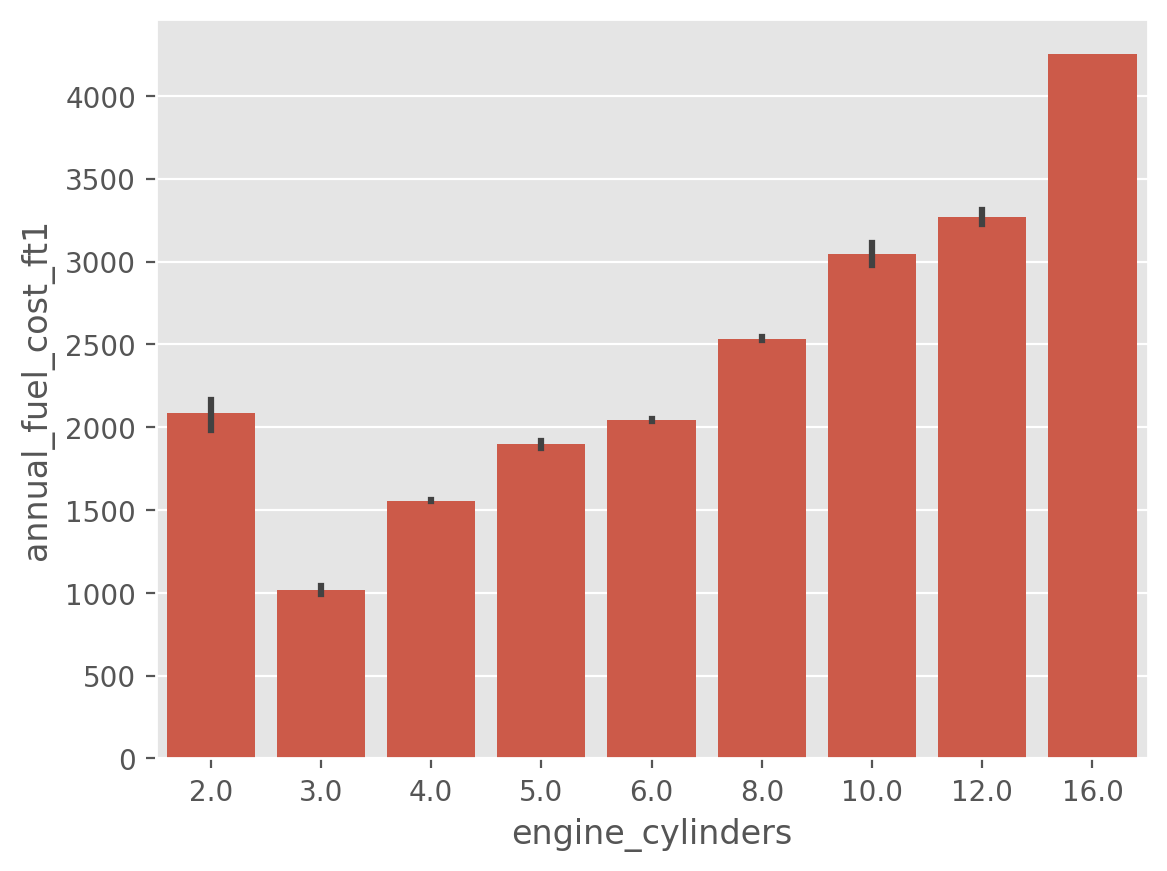

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

import seaborn as sns

sns.barplot(data=data, x="engine_cylinders", y="annual_fuel_cost_ft1")

#sns.histplot(data=data, x="engine_cylinders", y="annual_fuel_cost_ft1")

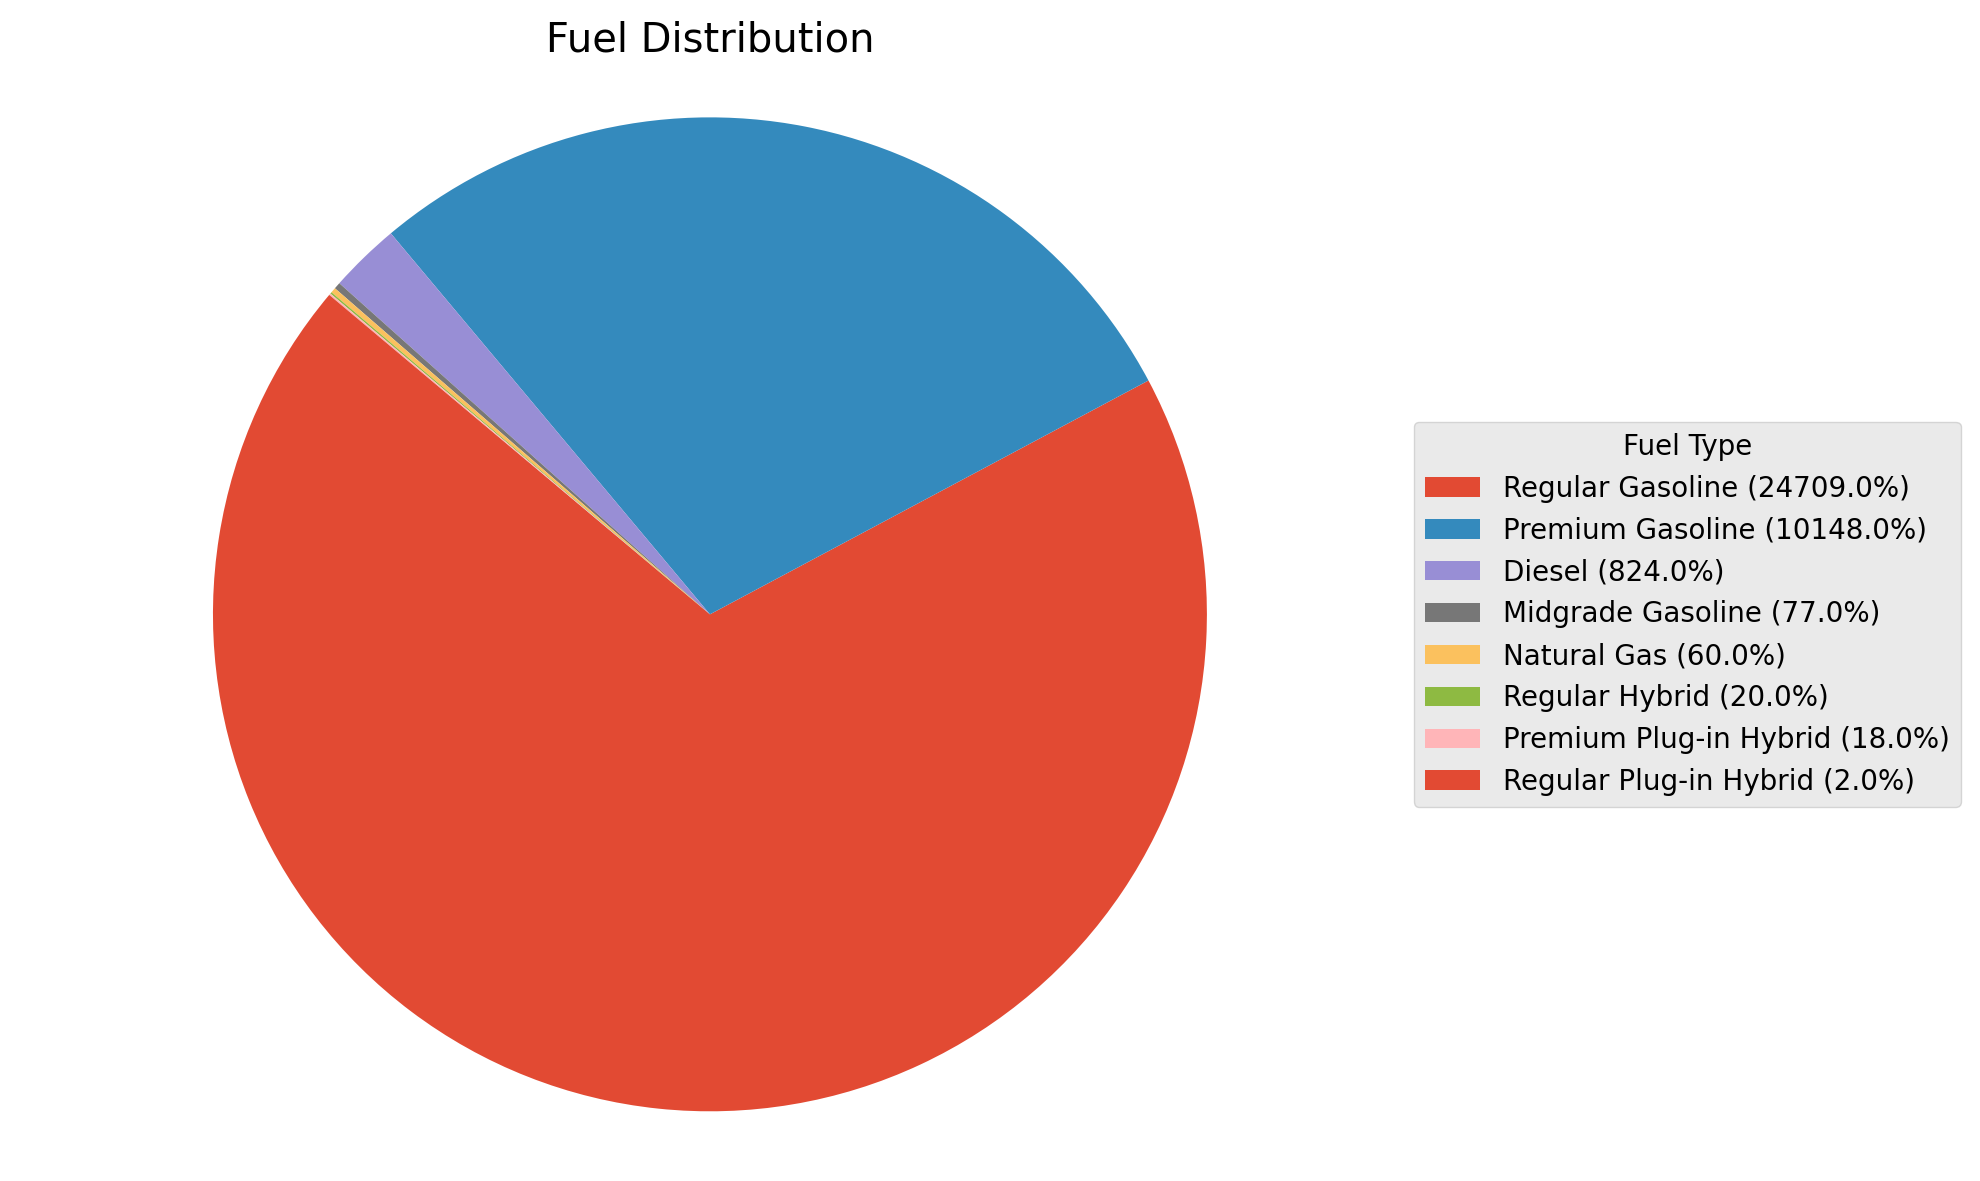

In [29]:
dataaa = data['fuel_type_1'].value_counts()
labels = dataaa.index
size = dataaa.values

# Create a pie chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot the pie chart
wedges, _ = plt.pie(size, labels=None, startangle=140)

# Combine labels with percentage values for legend
legend_labels = [f'{label} ({size:.1f}%)' for label, size in zip(labels, size)]

# Add labels with percentage values in the legend
plt.legend(wedges, legend_labels, loc="center left", bbox_to_anchor=(1, 0.5), title="Fuel Type")

plt.title('Fuel Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()  # Adjust layout
plt.show()

In [73]:
data['decade'] = ((data['year']//10).round().astype(int) * 10).astype(str)+'s'
data

,year,make,model,class,drive,transmission,engine_cylinders,engine_displacement,fuel_type_1,city_mpg_ft1,highway_mpg_ft1,highway_electricity_consumption,combined_mpg_ft1,combined_electricity_consumption,annual_fuel_cost_ft1,annual_consumption_in_barrels_ft1,tailpipe_co2_in_grams_mile_ft1,gears,decade
vehicle_id,,,,,,,,,,,,,,,,,,,
27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle,2-Wheel Drive,Auto,4.0,2.5,Regular Gasoline,18,17,0.0,17,0.0,2050,19.388824,522.764706,3,1980s
27549,1984,AM General,FJ8c Post Office,Special Purpose Vehicle,2-Wheel Drive,Auto,6.0,4.2,Regular Gasoline,13,13,0.0,13,0.0,2700,25.354615,683.615385,3,1980s
27593,1984,American Motors Corporation,Eagle 4WD,Special Purpose Vehicle,4-Wheel or All-Wheel Drive,Auto,6.0,4.2,Regular Gasoline,15,20,0.0,17,0.0,2050,19.388824,522.764706,3,1980s
28455,1984,American Motors Corporation,Eagle 4WD,Special Purpose Vehicle,4-Wheel or All-Wheel Drive,Auto,6.0,4.2,Regular Gasoline,15,19,0.0,17,0.0,2050,19.388824,522.764706,3,1980s
27591,1984,American Motors Corporation,Eagle 4WD,Special Purpose Vehicle,4-Wheel or All-Wheel Drive,Manual,4.0,2.5,Regular Gasoline,19,22,0.0,20,0.0,1750,16.480500,444.350000,4,1980s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37564,2017,Volvo,XC60 FWD,Small Sport Utility Vehicle,Front-Wheel Drive,Auto,4.0,2.0,Regular Gasoline,23,30,0.0,26,0.0,1350,12.677308,348.000000,8,2010s
37547,2017,Volvo,XC90 AWD,Sport Utility Vehicle,All-Wheel Drive,Auto,4.0,2.0,Premium Gasoline,20,25,0.0,22,0.0,1900,14.982273,399.000000,8,2010s
37548,2017,Volvo,XC90 AWD,Sport Utility Vehicle,All-Wheel Drive,Auto,4.0,2.0,Premium Gasoline,22,25,0.0,23,0.0,1850,14.330870,384.000000,8,2010s


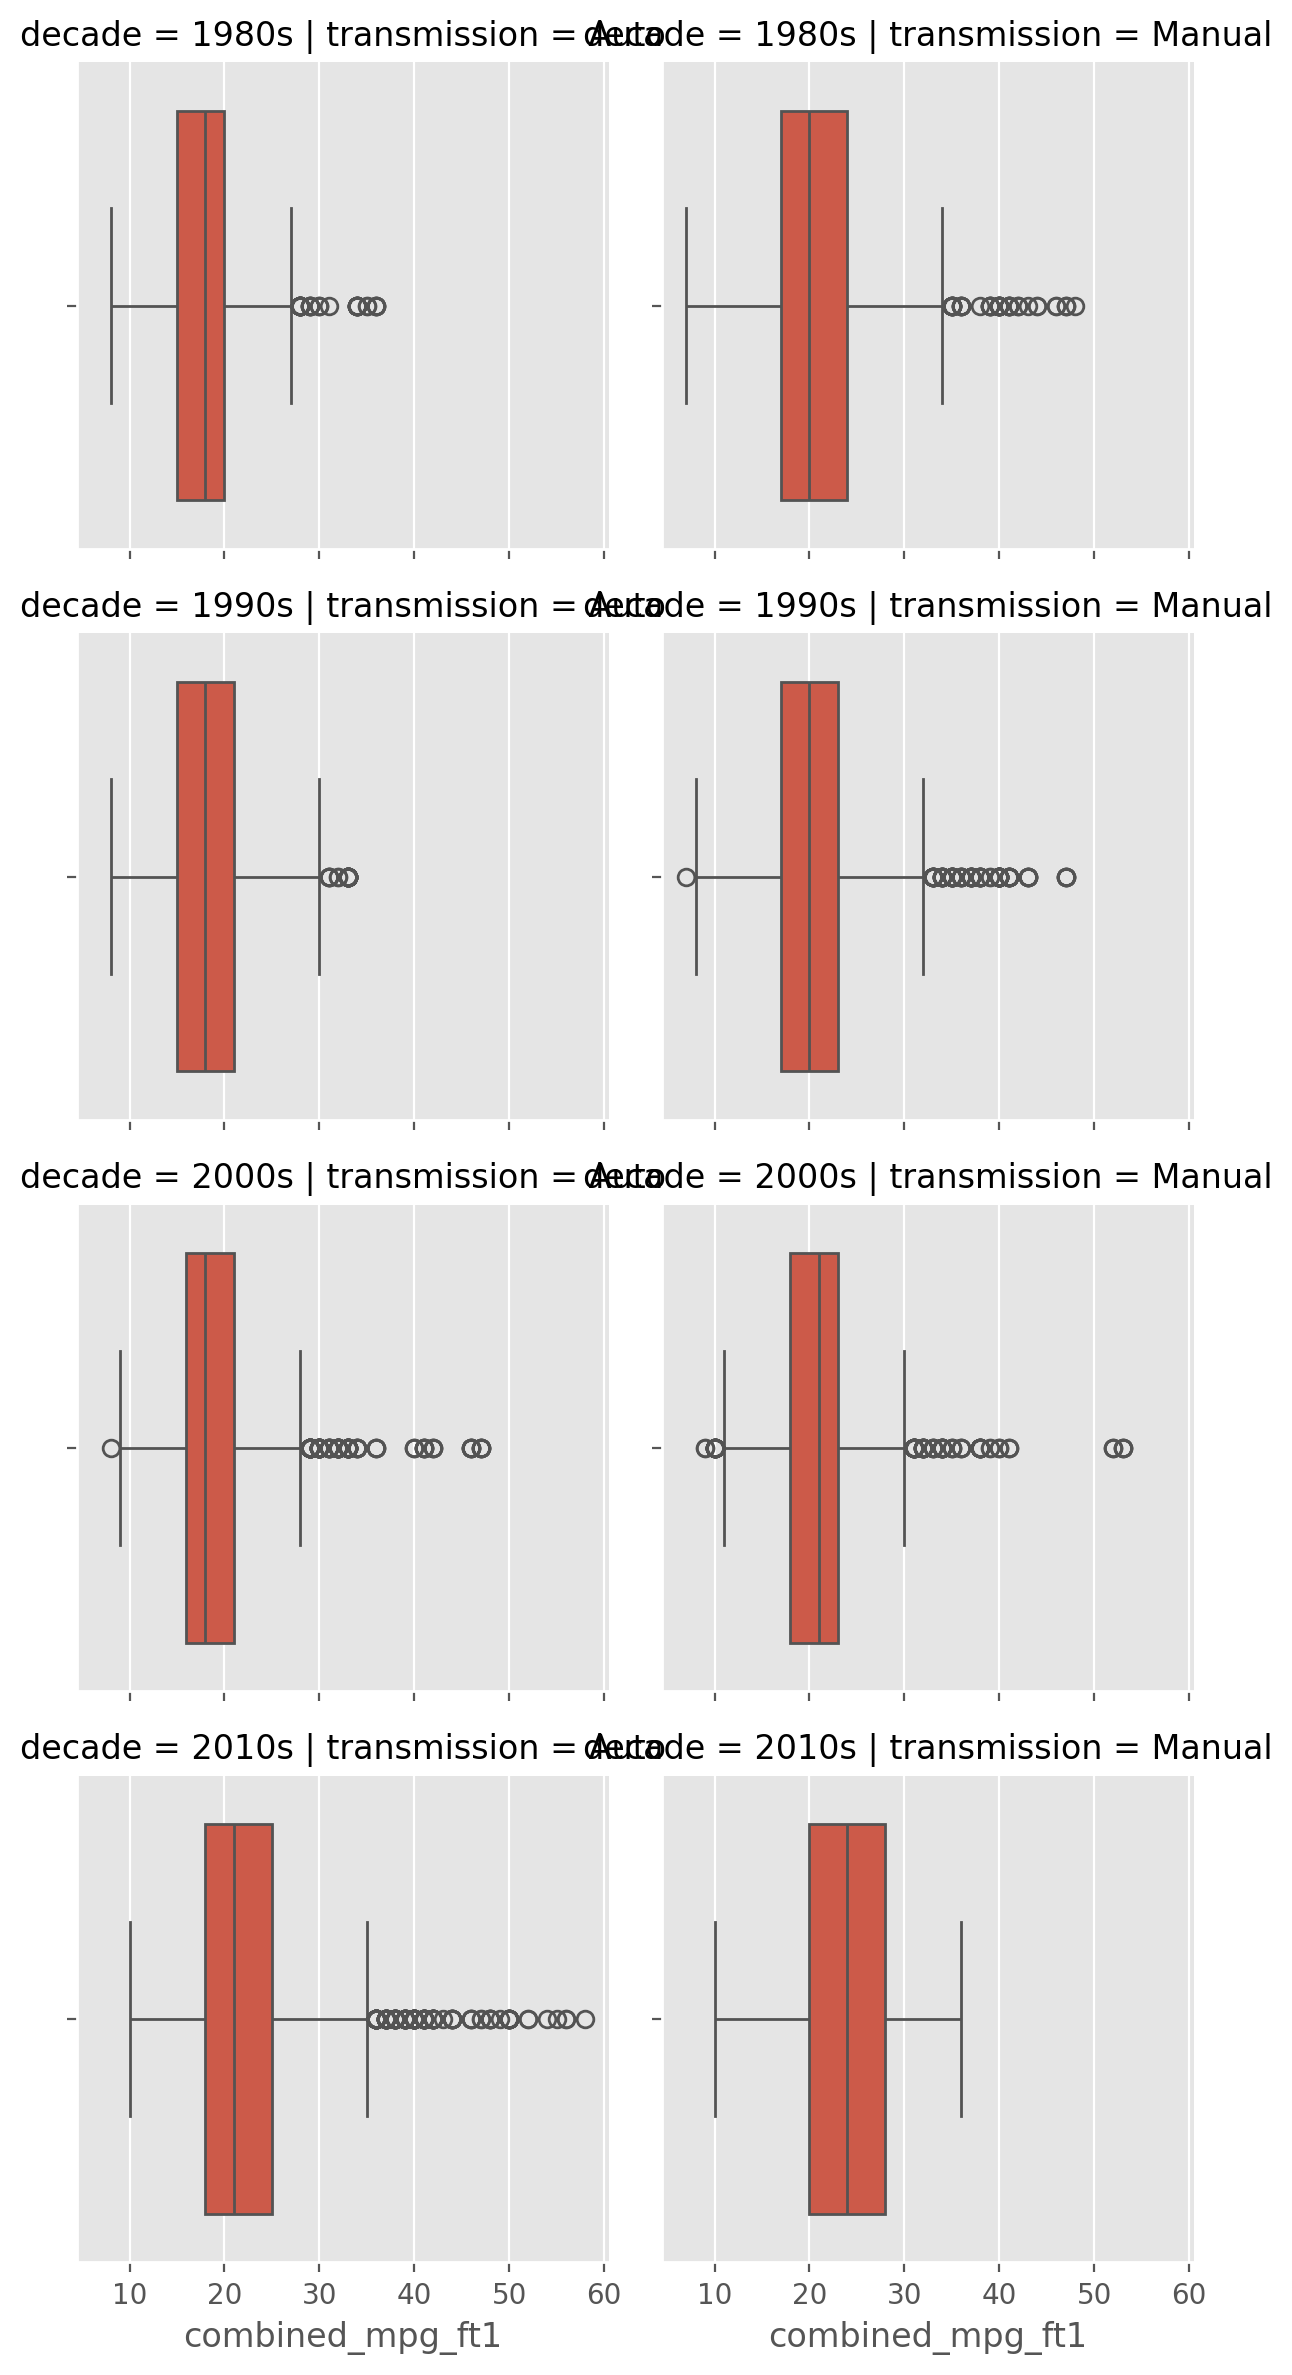

In [74]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

import seaborn as sns

g = sns.FacetGrid(data, col='transmission', row='decade')
g.map_dataframe(sns.boxplot, x='combined_mpg_ft1')